# Question 1

In [ ]:
from scipy.io import loadmat
data = loadmat('/content/drive/My Drive/dataset_1.mat')
data2 = loadmat('/content/drive/My Drive/dataset_2.mat')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
samples = data['samples']
labels = data['labels']
samples2 = data2['samples']
labels2 = data2['labels']

# Question 1.a)

In [ ]:
def plot_images():
  k=0
  while(k<10):
      i=0
      j=0
      f = plt.figure(figsize=(20,20))

      while(i < 10):
          if(labels[0][j] == k):
              plt.subplot(k+1, 10, i+1)
              plt.imshow(samples[j])
              plt.axis('off')
              i+=1
          j+=1
  #     plt.legend(str(k))
  #     print(k)
      plt.title('Class:'+str(k))
      plt.show()
      k+=1

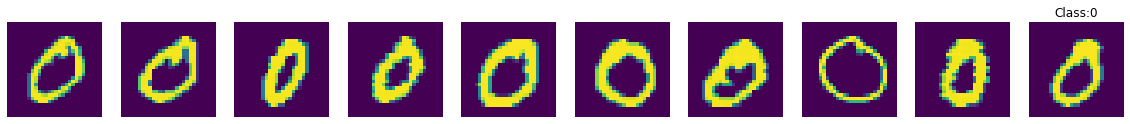

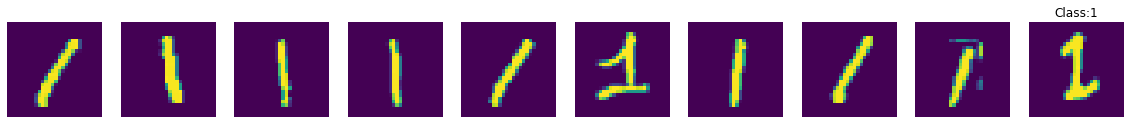

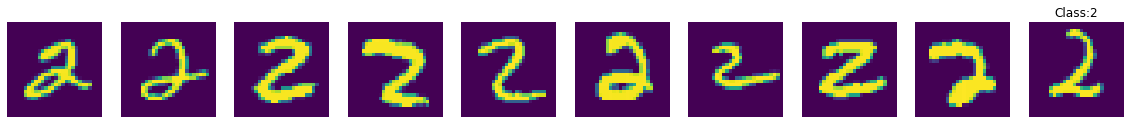

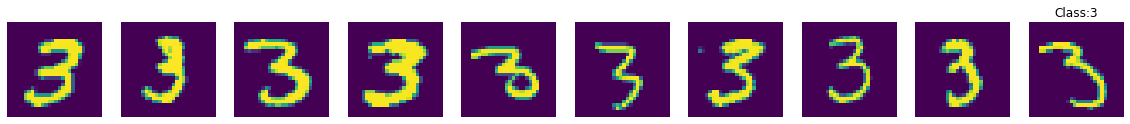

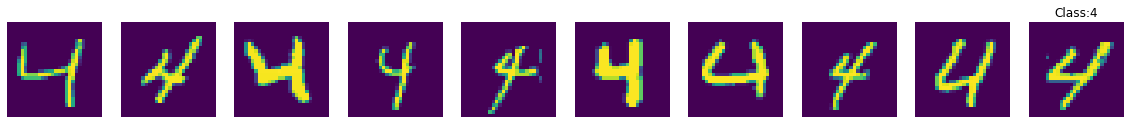

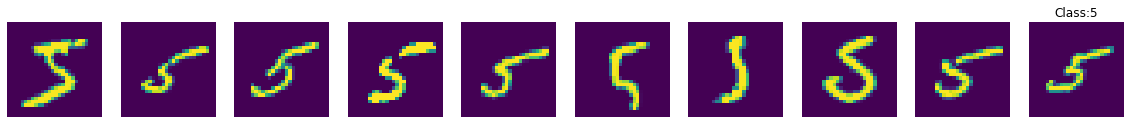

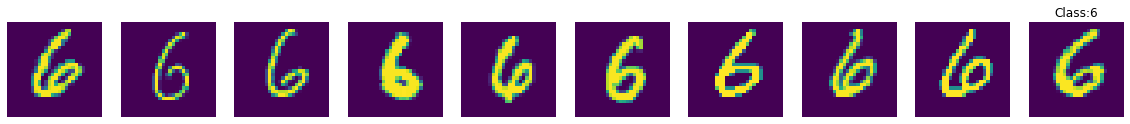

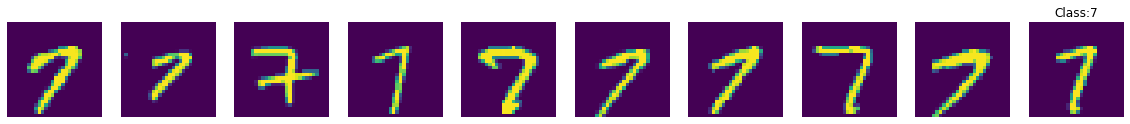

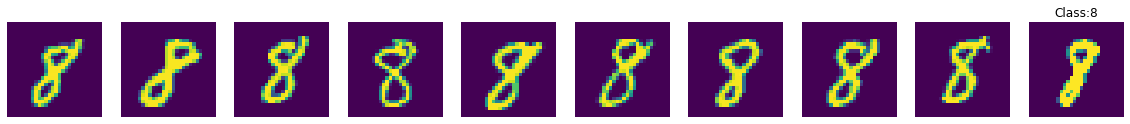

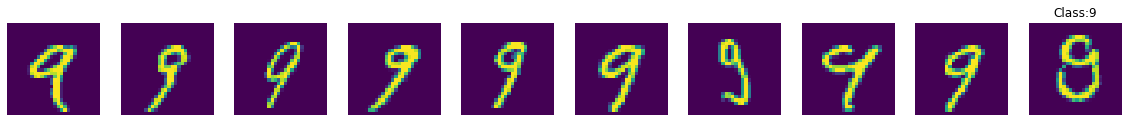

In [ ]:
plot_images()

# Question 1.b)

In [ ]:
print(samples2.shape, labels2.shape)

(20000, 2) (1, 20000)


In [ ]:
n=20000
ds = pd.DataFrame(samples2,columns=['x','y'])
ds['label'] = labels2[0]
print(ds)

              x         y  label
0     -3.742040 -3.044657      0
1      4.608712  7.017659      3
2      5.311356  0.970120      2
3      4.881857  5.295445      3
4     -4.517404 -1.755663      0
...         ...       ...    ...
19995  5.052006  1.276917      2
19996  4.035034  6.306404      3
19997  5.176663  5.107464      3
19998  6.665637  5.465137      3
19999  7.866900  4.496412      3

[20000 rows x 3 columns]


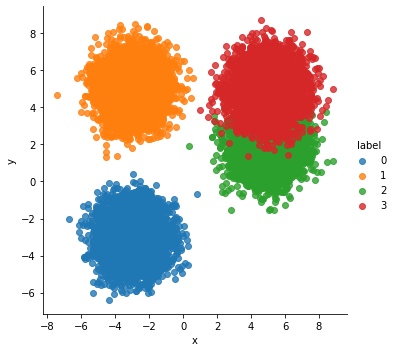

In [ ]:
sn.lmplot(data=ds, x='x', y='y', hue='label',
                   fit_reg=False, legend=True, legend_out=True)

# Question 1.c)

In [ ]:
y=labels[0]

In [ ]:
sample = samples.reshape(samples.shape[0],(samples.shape[1] * samples.shape[2]))

In [ ]:
print(sample.shape)

(50000, 784)


In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_results_2D = tsne.fit_transform(sample)

In [ ]:
print(tsne_results_2D)

[[-14.04399681 -14.32210255]
 [-40.54678345   1.89445996]
 [-33.85861588  40.13895416]
 ...
 [  9.89158154 -13.9372406 ]
 [-18.46474266  31.80657196]
 [ 11.7588892  -15.82577801]]


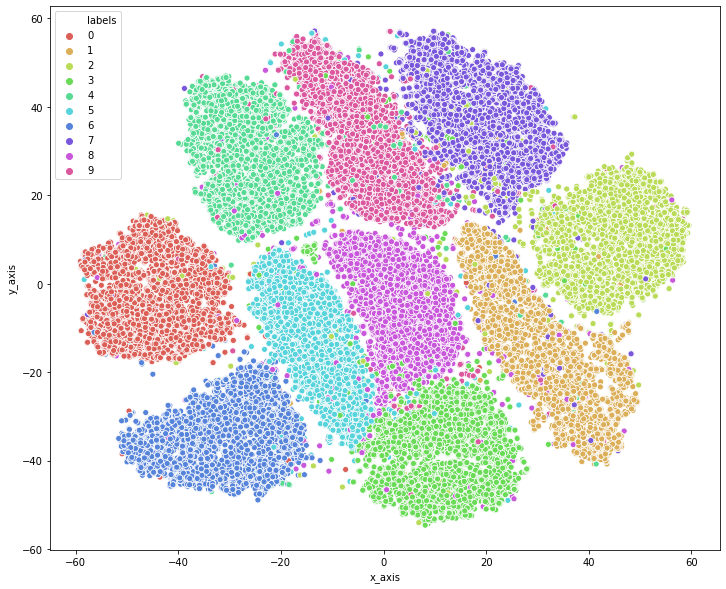

In [ ]:
df = pd.DataFrame()
df['x_axis'] = tsne_results_2D[:,0]
df['y_axis'] = tsne_results_2D[:,1]
df['labels'] = y
plt.figure(figsize=(12,10))
sn.scatterplot(
    x="x_axis", y="y_axis",
    hue="labels",
    palette=sn.color_palette("hls", 10),
    data=df,
    legend="full",
)

# Question 1.d)

In [ ]:
sample = samples.reshape(samples.shape[0],(samples.shape[1] * samples.shape[2]))

In [ ]:
tsne = TSNE(n_components=3, random_state=0)
tsne_results_3D = tsne.fit_transform(sample)

In [ ]:
y=labels[0]
print(tsne_results_3D.shape)

(50000, 3)


In [ ]:
print(tsne_results_3D)

[[ -0.55412436  -2.39819026 -11.09022045]
 [ 10.77586269 -11.69177246   2.29227233]
 [-13.10161018   7.94839382 -18.57939529]
 ...
 [ -4.96062183  -2.68930697   3.63982749]
 [ -3.65725493   3.91163754 -11.21790123]
 [ -7.38713884  -0.71674258   1.08601665]]


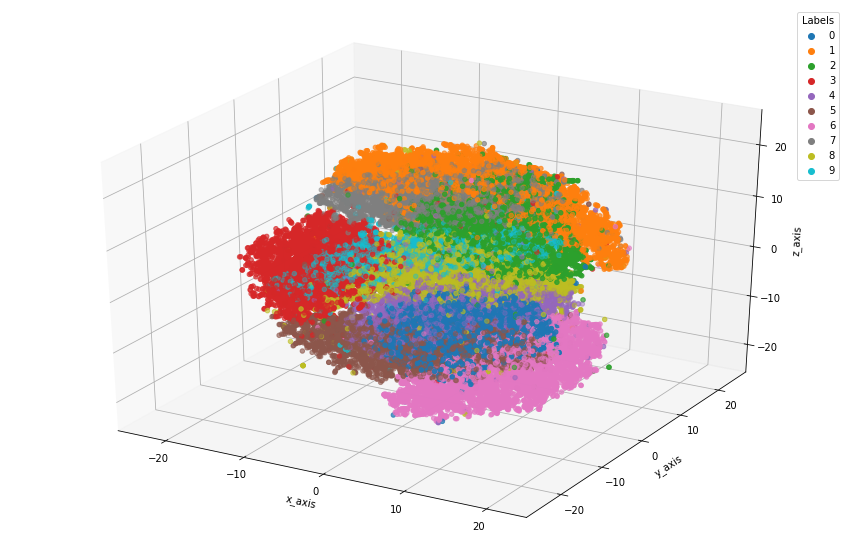

In [ ]:
ax = plt.figure(figsize=(15,10)).gca(projection='3d')
sctr = ax.scatter(
    xs=tsne_results_3D[:,0], 
    ys=tsne_results_3D[:,1], 
    zs=tsne_results_3D[:,2], 
    c=y,
    cmap='tab10'
)
ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('z_axis')
plt.legend(handles=sctr.legend_elements()[0],
           labels=np.unique(y).tolist(),
           title='Labels')
plt.show()